# Personalized (n=1) Hidden Markov Model

In [1]:
import CSV
import HiddenMarkovModels as hmms
import DataFrames as DF
import Random
import Distributions as dists
import XLSX
include("HelperFunctions.jl")
import .HelperFunctions as hf
import Plots as plt

### Organizing data

In [2]:
# Trust thresholds 
states = [0.0, 0.5]

# Using the version of the EDA, ECG, and respiration features with the pre-trial baseline subtracted out
ind = collect(11:9:153)
features = [("Features",2)]
for i in ind
    push!(features,("Features",i))
end

# Filename where all features are located
data_files = ["C:/Users/SARAH/Desktop/DMU/Project/ASEN5264/FeaturesForModelsAFP30.xlsx"]

# Organizing feature data
data = hf.merge_data(data_files,features)

Row,SessionID,Trust,Features_2,Features_11,Features_20,Features_29,Features_38,Features_47,Features_56,Features_65,Features_74,Features_83,Features_92,Features_101,Features_110,Features_119,Features_128,Features_137,Features_146
,String,Float64,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,AFP30S1,0.5,0.00341664,0.0175439,-0.270558,0.0105311,0.281467,1.26455,0.348152,5.49062,2.79941,3.58568,0.0425322,2.30317,6.61535,-0.0239682,-0.26789,0.642854,2.2984
2,AFP30S1,0.48,0.000234124,0,-1.34049,-0.00610459,0.538444,1.33148,4.94401,17.4503,1.9274,0.71748,2.8031,0.650122,0.975024,0.235933,-0.111158,0.158719,0.648508
3,AFP30S1,0.49,-0.000821506,0,-0.00786907,-0.00524863,0.788306,1.33133,8.2506,24.9591,0.956883,0.270423,2.00106,0.504508,0.814922,-0.0123897,-0.222262,0.164547,0.501902
4,AFP30S1,0.49,-0.000766629,0,-1.33374,0.000310308,0.784359,1.33323,9.67778,28.0257,1.85201,0.626432,2.99083,0.397651,0.434048,0.00244407,-3.28019e-6,0.0909648,0.396658
5,AFP30S1,0.52,-0.000811529,0,-2.66727,-0.00638459,0.877952,1.33317,8.4432,25.3861,1.4408,0.246642,2.81698,0.303017,0.145878,0.00590309,-0.222225,0.0883164,0.301674
6,AFP30S1,0.49,-0.00297411,0,-7.12759e-5,-0.00592264,1.06695,1.33332,13.4661,35.7021,1.61451,0.283564,2.85185,0.0695774,0.0726765,0.0272032,-0.2,0.0335949,0.0679671
7,AFP30S1,0.5,-0.000673635,0,-2.66588,-0.00715787,0.823816,2.66689,9.36137,33.6379,1.41727,0.0931721,2.4966,0.0869373,-0.119076,-0.00103852,0.0222289,0.0550403,0.0846592
8,AFP30S1,0.5,0.0068647,0.0327869,-2.11469,0.0166078,0.661462,0.775105,5.12627,15.5244,1.50224,0.312355,2.72518,0.255728,0.345913,-0.00157501,-0.176682,0.0400904,0.253124
9,AFP30S1,0.52,-0.00565584,-0.0566038,2.32965,-0.00347717,0.461905,3.91131,2.40547,20.7051,0.0849382,0.0230681,0.00834771,0.455609,1.14303,0.0371652,-0.00206943,0.141175,0.455236


### Initializing Transition and Emission Distributions with Ground Truth Trust Data

In [3]:
# initial transition and emission distributions
trans_guess,dists_guess = hf.create_estimates(states,features,data_files)

([0.9285714285714286 0.07142857142857142; 0.022727272727272728 0.9772727272727273], Distributions.FullNormal[FullNormal(
dim: 17
μ: [-0.0023088524224179185, 0.0010985520653153747, -3.2311085447792394, -0.009350403843859037, 0.7287978055158866, 1.4010077988862886, 9.108675784558253, 25.706888767212405, -2.005614905064483, -2.0267019379883235, -1.5121970513653729, -0.01850797210822682, 0.06842399409808814, -0.0014757125587209928, 0.20110062180289764, 0.02330646775147798, -0.018793962782912545]
Σ: [0.00664800658232205 0.0 … 0.0 0.0; 0.0 0.03270541248360589 … 0.0 0.0; … ; 0.0 0.0 … 0.1106434664635434 0.0; 0.0 0.0 … 0.0 0.39364652654326365]
)
, FullNormal(
dim: 17
μ: [-0.0003916566630020207, -0.0026548442800585965, -2.051903894932766, -0.0047204019503688, 0.3178800282413882, 1.2046346571960396, 1.687410101813154, 8.467748665016313, -0.8876660919423862, -1.0599035410339748, -0.5692998070051273, -0.20359227441135772, -0.5230636019132358, -0.007858784654660174, -0.0011333725916012794, -0.04712

In [4]:
# initial trust distribution (assuming binary low/high)
init_guess = [0.5,0.5]

2-element Vector{Float64}:
 0.5
 0.5

In [5]:
# using HiddenMarkovModels.jl
hmm_guess = hmms.HMM(init_guess, trans_guess, dists_guess)

Hidden Markov Model with:
 - initialization: [0.5, 0.5]
 - transition matrix: [0.9285714285714286 0.07142857142857142; 0.022727272727272728 0.9772727272727273]
 - observation distributions: [FullNormal(
dim: 17
μ: [-0.0023088524224179185, 0.0010985520653153747, -3.2311085447792394, -0.009350403843859037, 0.7287978055158866, 1.4010077988862886, 9.108675784558253, 25.706888767212405, -2.005614905064483, -2.0267019379883235, -1.5121970513653729, -0.01850797210822682, 0.06842399409808814, -0.0014757125587209928, 0.20110062180289764, 0.02330646775147798, -0.018793962782912545]
Σ: [0.00664800658232205 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.03270541248360589 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 2.811261912430945 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.01652729113769685 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.42705380052591796 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [6]:
# This line of code is what allows us to relate multiple observations to one state
obs_seq,seq_ends = hf.thread_observations(data_files,features)

([[0.0034166389832648685, 0.017543859649122806, -0.27055777314620855, 0.010531100037515024, 0.28146736510148385, 1.2645474588046355, 0.3481522723924968, 5.490615187486384, 2.799409070706382, 3.5856761665897814, 0.04253220873738428, 2.3031689761009577, 6.615350458943581, -0.023968160602365174, -0.26788952665828797, 0.6428540447828892, 2.298403611790745], [0.0002341236492267966, 0.0, -1.340490601868197, -0.0061045878976691975, 0.5384439319666834, 1.331482315608799, 4.944009043233937, 17.450253383824688, 1.9274048445667837, 0.7174804261758077, 2.803096513969674, 0.6501218054246315, 0.9750235818440132, 0.23593330595287654, -0.11115841489740474, 0.15871851078180366, 0.6485083200734828], [-0.00082150636194709, 0.0, -0.007869065274633158, -0.005248634459470387, 0.7883063189462396, 1.3313327235177503, 8.2506013996218, 24.959051553071546, 0.9568832539965548, 0.27042286291996476, 2.0010629768647625, 0.5045083645311014, 0.8149215508585357, -0.012389682665492785, -0.22226223441853388, 0.1645474496

### Baum-Welch

In [7]:
hmm_est, llh_evolution = hmms.baum_welch(hmm_guess,obs_seq;seq_ends)

(Hidden Markov Model with:
 - initialization: [0.5000355392904975, 0.49996446070950257]
 - transition matrix: [0.95206369513431 0.047936304865690116; 0.06082874069131572 0.9391712593086844]
 - observation distributions: [FullNormal(
dim: 17
μ: [-0.002275651207382735, -0.006957079213781578, -1.1652762738266274, -0.006191555860753313, 0.7560830400124408, 1.5622331997979828, 11.296399290358163, 28.69656959439043, -1.5284060838869367, -1.5928776876778257, -1.146944087455468, -0.05171643496222515, 0.13875444506068926, -0.0016429786636641016, 0.132750170590712, -0.0012497542405405751, -0.052272846581605505]
Σ: [3.654912737413261e-5 0.0001475827221633403 0.00023542756825171982 5.7351707775110744e-5 -0.00016153397964827973 -0.004704409921966839 0.002511965006786649 -0.015911487929577486 0.003412768027144823 0.0026855038555715556 0.003552481033197894 -0.0005216831273540237 -0.0022000801357590664 -8.074040959895246e-6 -0.00039044288885846655 -0.0002107600070985672 -0.0005219528361042015; 0.00014

### Viterbi

In [8]:
# Using the Viterbi algorithm to decode the most likely state sequence
best_state_seq, _ = hmms.viterbi(hmm_est,obs_seq;seq_ends)

([2, 2, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [363.54923215069, 260.7405571650323, 494.0992583928412, 345.81395325071867])

In [9]:
# initializing
best_seqs = Vector{Vector{Int64}}()

# deconcatenate sequences
for i=1:length(seq_ends)
    start,stop = hmms.seq_limits(seq_ends,i)
    push!(best_seqs,best_state_seq[start:stop])
end

### Plotting

In [10]:
gt_trust = DF.DataFrame(XLSX.readdata("C:/Users/SARAH/Desktop/DMU/Project/ASEN5264/FeaturesForModelsAFP30.xlsx", "Trust", "A2:A193"), :auto)
gt_trust = Float64[x for x in gt_trust.x1]
truth_state = [num > 0.5 ? 2 : 1 for num in gt_trust]

192-element Vector{Int64}:
 1
 1
 1
 1
 2
 1
 1
 1
 2
 2
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2

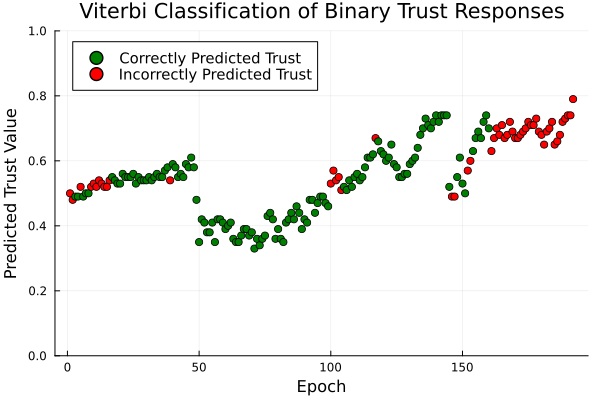

In [11]:
plt_obj = plt.scatter( 1:length(truth_state), gt_trust, label=false,color = [value1 == value2 ? "green" : "red" for (value1, value2) in zip(truth_state, best_state_seq) ], xlabel = "Epoch", ylabel = "Predicted Trust Value", title = "Viterbi Classification of Binary Trust Responses", grid = true,ylim=(0,1))
plt.scatter!([],[],color="green",label="Correctly Predicted Trust");
plt.scatter!([],[],color="red",label="Incorrectly Predicted Trust",legendfontsize=10);
display(plt_obj)